<a href="https://colab.research.google.com/github/jsansao/dlvc/blob/main/Licao1_PIL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lição 1 - Introdução à biblioteca *Pillow*

Neste notebook, vamos passar por algumas funções e procedimentos importantes relativos ao tratamento de imagens, como carregar, escrever, exibição e outras operações básicas. 

A referência na qual baseamos essa atividade é o [Tutorial oficial do Pillow](https://pillow.readthedocs.io/en/stable/handbook/tutorial.html)


Mais informações estão na [documentação](https://pillow.readthedocs.io/en/stable/index.html). 


## Operações básicas

**Carregando a classe Pillow para tratamento de imagens no Python**

In [2]:
from PIL import Image

**Baixando imagens para os exemplos:**

In [3]:
!wget https://github.com/jsansao/dlvc/raw/main/monalisa.png

--2021-08-17 18:38:58--  https://github.com/jsansao/dlvc/raw/main/monalisa.png
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jsansao/dlvc/main/monalisa.png [following]
--2021-08-17 18:38:58--  https://raw.githubusercontent.com/jsansao/dlvc/main/monalisa.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 237094 (232K) [image/png]
Saving to: ‘monalisa.png’

monalisa.png        100%[===================>] 231.54K  --.-KB/s    in 0.004s  

2021-08-17 18:38:58 (53.7 MB/s) - ‘monalisa.png’ saved [237094/237094]



**Carregando uma imagem usando o PIL**

In [29]:
im = Image.open("monalisa.png")

**Salvando imagem**


In [30]:
im.save("copia_monalisa.png")

**Exibindo os atributos do arquivo carregado:**


In [31]:
print(im.format, im.size, im.mode)

PNG (267, 354) RGBA


**Exibindo o arquivo carregado (se estiver no terminal):**

In [14]:
im.show()

**Exibindo arquivo no colab:**

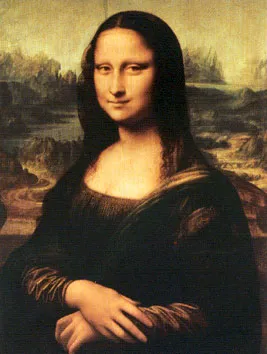

In [15]:
display(im)

**Cortando imagens, comando crop**

A 4-tupla `box` que define os limites da (esquerda, superior, direito, inferior). A origem do sistema de coordenadas está no canto superior esquerdo.



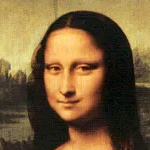

In [32]:
box = (50, 0, 200, 150) 
region = im.crop(box)
display(region)

**Processando região e colando novamente**

Vamos espelhar a região cortada e colar novamente na imagem original:

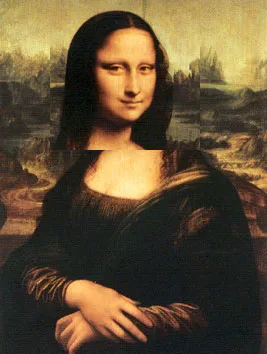

In [33]:
region = region.transpose(Image.FLIP_LEFT_RIGHT)
im.paste(region, box)
display(im)

**Processamento em bandas de cores**

Vamos recarregar a imagem original e separar em bandas R, G,B e A. 

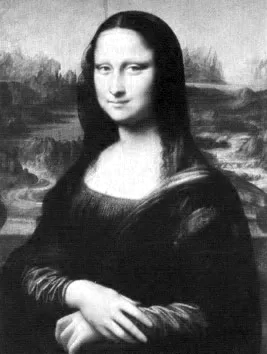

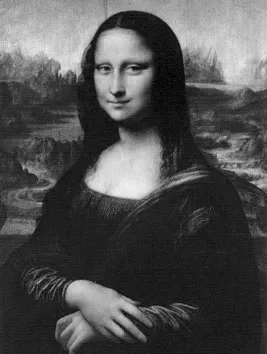

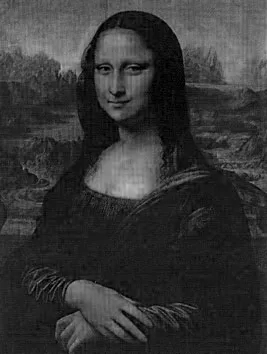

(None, None, None)

In [40]:
im = Image.open('monalisa.png')
r, g, b, a = im.split()
display(r), display(g), display(b)

**Reconstruindo a imagem, sem a banda A:**

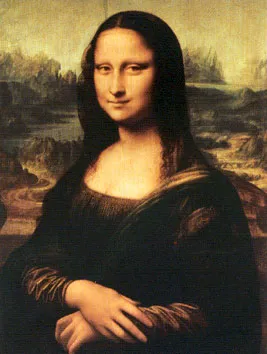

In [45]:
imRGB = Image.merge("RGB", (r, g, b))
display(imRGB)

## Transformações geométricas



### Transformações geométricas simples

**Redimensionamento**

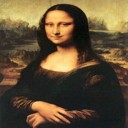

In [56]:
saida_1 = imRGB.resize((128, 128))
display(saida_1)

**Rotação**

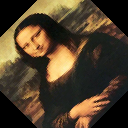

In [57]:
saida_2 = saida_1.rotate(45)
display(saida_2)

**Transposição**

A biblioteca PIL também fornece o comando transpose, que pode executar algumas rotações e espelhamentos (FLIP)

In [58]:
out = imRGB.transpose(Image.FLIP_LEFT_RIGHT)
out = imRGB.transpose(Image.FLIP_TOP_BOTTOM)
out = imRGB.transpose(Image.ROTATE_90)
out = imRGB.transpose(Image.ROTATE_180)
out = imRGB.transpose(Image.ROTATE_270)

## Transformações de cores

É possivel usar os seguintes modos usando o comando ``convert``: ``RGB``, ``L`` (iluminância, tons de cinza), ``P`` (paletizado).


In [81]:
im_L = im.convert("L")
im_P = im.convert("P")



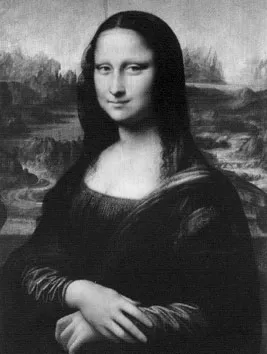

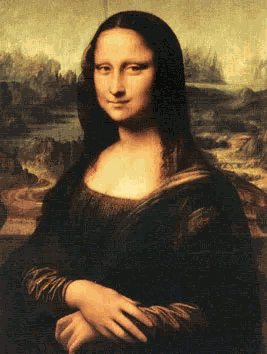

In [92]:
display(im_L,im_P)

## Tratamento de imagem

### Filtros

**Comando de filtragem**

A biblioteca PIL oferece o comando ``filter`` e alguns filtros pré-definidos

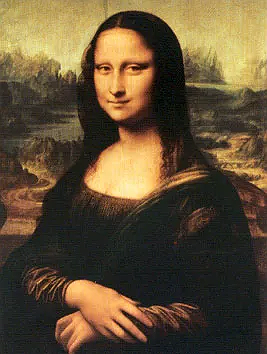

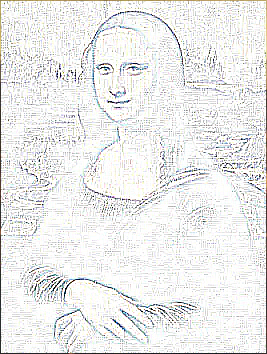

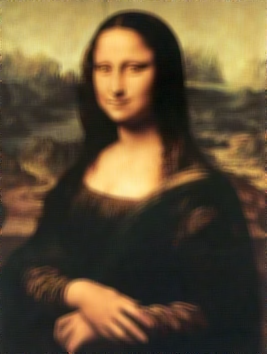

In [91]:
from PIL import ImageFilter
Im_DETAIL = im.filter(ImageFilter.DETAIL)
Im_CONTOUR = im.filter(ImageFilter.CONTOUR)
Im_BLUR = im.filter(ImageFilter.BLUR)
display(Im_DETAIL,Im_CONTOUR,Im_BLUR)


### Operações de ponto

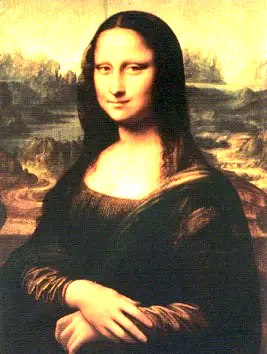

In [93]:
# multiplica cada pixel por 1.5
out = im.point(lambda i: i * 1.5)
display(out)

**Processando em bandas separadas**

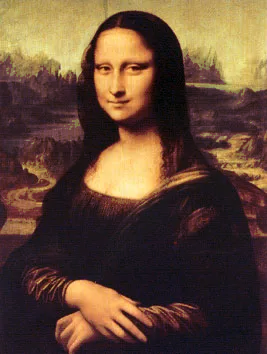

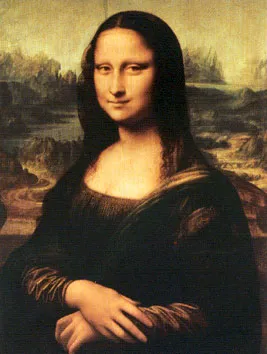

In [109]:
# separar as bandas
source = im.split()

R, G, B = 0, 1, 2

# selecionar regiões onde R é menor que 100
mask = source[R].point(lambda i: i < 128 and 255)

# reduzindo o valor na banda G
out = source[G].point(lambda i: i * 0.7)

# Aplica máscara da banda vermelha na banda verde 
source[G].paste(out, None, mask)

# reconstruindo imagem
im_bandas = Image.merge(im.mode, source)

display(im_bandas, im)

### Operações de tratamento de imagem

O comando ``ImageEnhance `` oferece diversas operações como alteração de contraste, brilho, balanço de cores e aguçamento. 

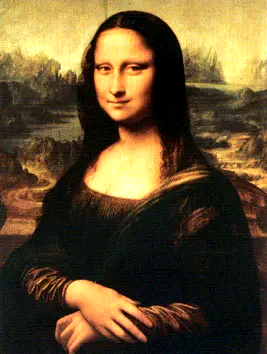

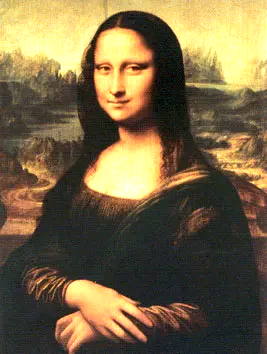

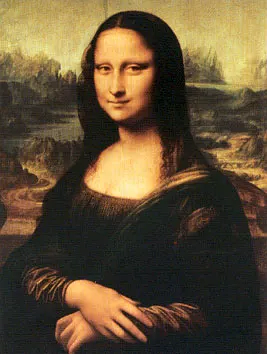

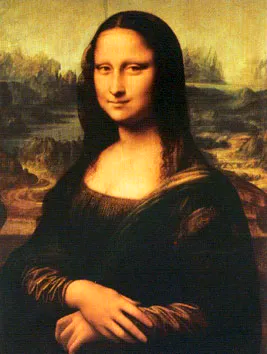

In [118]:
from PIL import ImageEnhance

enh = ImageEnhance.Contrast(im)
im2 = enh.enhance(1.3)
enh = ImageEnhance.Brightness(im)
im3 = enh.enhance(1.3)
enh = ImageEnhance.Sharpness(im)
im4 = enh.enhance(1.3)
enh = ImageEnhance.Color(im)
im5 = enh.enhance(1.3)

display(im2,im3, im4, im5)